# Interpolacja

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tabulate import tabulate

## Węzyły czebyszewa

In [2]:
def chebyshev_nodes(a, b, n):
    return np.vectorize(lambda x : 0.5*(a+b) + .5*(b-a)*np.cos((2*x - 1)*np.pi/(2*n)))(np.arange(1, n+1))

## Równomierny rozkład

In [3]:
def  uniform_nodes(a, b, n):
    return np.linspace(a, b, n)

## Funkcje pomocnicze

In [4]:
# Sortowanie wartości x i y
def sort_data(x, y):
    indexes = x.argsort()
    return x[indexes], y[indexes]
    

## Ze wzoru Lagrange'a

In [5]:
def interpolation_lagrange(x, y, n):
    x, y = sort_data(x, y)
    new_x = uniform_nodes(x[0], x[-1], n)
    new_y = np.zeros(len(new_x))
    
    for k in range(len(x)):        
        def f(nx):
            nx_vector = np.full(x.shape[0], nx)
            d =  np.prod((nx_vector - x), where=x!=x[k])
            m = np.prod(x[k] - x, where=x!=x[k])
            return d/m
        
        L = np.vectorize(f)(new_x)
        new_y += L*y[k]
    return new_x, new_y

## Ze wzoru Newtona

In [6]:
def interpolation_newton(x, y, n):
    x, y = sort_data(x, y)
    f = np.zeros((x.shape[0], x.shape[0]))
    f[:,0] = y

    for k in range(1, x.shape[0]):
        f[k:, k] = (f[k:, k-1] - f[k-1:-1, k-1]) / (x[k:] - x[:-k])
       
    a = np.diagonal(f)
    new_x = uniform_nodes(x[0], x[-1], n)
    new_y = np.full(new_x.shape[0], a[0])
    
    # print(f)
    for k in range(1, x.shape[0]):
        new_y += a[k]*np.prod(np.tile(np.expand_dims(new_x, 1), k) - x[:k], axis=1)

    return new_x, new_y
    

### Błąd interpolacji

In [7]:
def max_error(function, x, y):
    return np.max(np.abs(np.vectorize(function)(x) - y))

def var(function, x, y):
    return sum(np.square(np.vectorize(function)(x) - y))/(x.shape[0]-1)

In [8]:
def f8(x):
    k=3
    m=0.2
    return np.sin(x*k/np.pi)*np.exp(-m*x/np.pi)

def get_nodes(function, n, nodes_func):
    x = nodes_func(-np.pi*np.pi, 2*np.pi*np.pi, n)
    y = np.vectorize(f8)(x)
    return x, y

## Funkcja do analizy

<IPython.core.display.Javascript object>


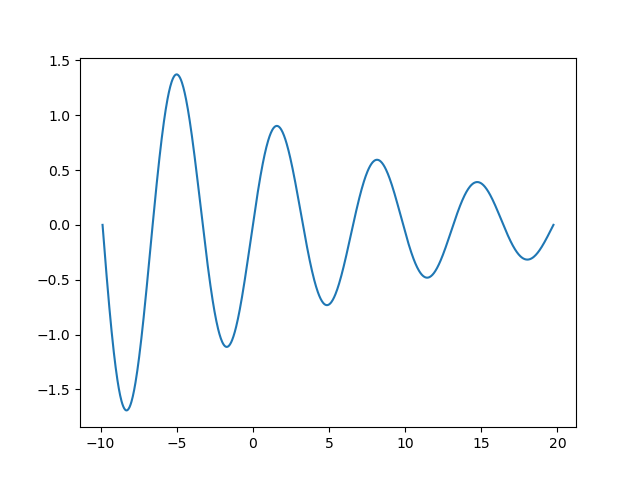

In [9]:
%matplotlib notebook
X, Y = get_nodes(f8, 1000, uniform_nodes)
plt.plot(X, Y)

## Testy

<IPython.core.display.Javascript object>


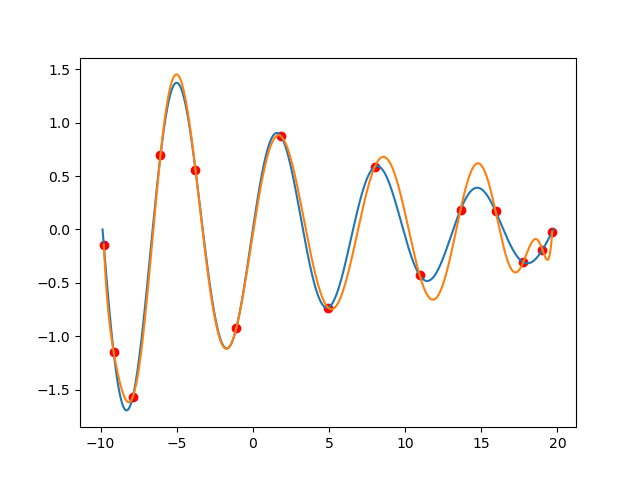

In [10]:
%matplotlib notebook
x, y = get_nodes(f8, 15, chebyshev_nodes)

nx, ny = interpolation_newton(x, y, 1000)
plt.plot(X, Y)
plt.plot(nx, ny)
plt.scatter(x, y, color='red')

<IPython.core.display.Javascript object>


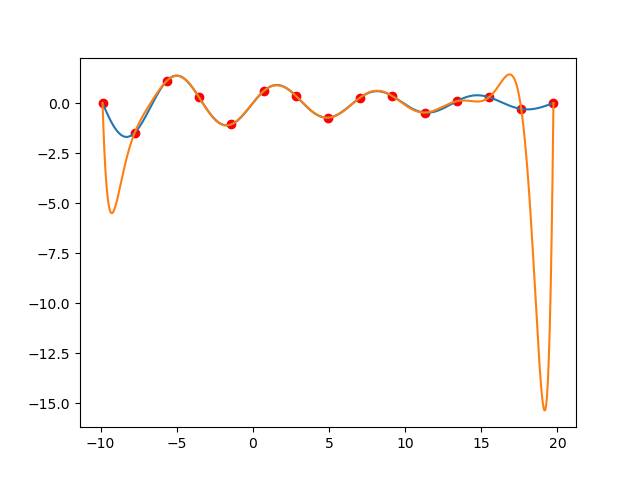

In [34]:
%matplotlib notebook
x, y = get_nodes(f8, 15, uniform_nodes)

nx, ny = interpolation_newton(x, y, 1000)
plt.plot(X, Y)
plt.plot(nx, ny)
plt.scatter(x, y, color='red')

In [15]:
def tests(interpolation, nodes):
    table_1 = ["Var"]
    table_2 = ["Max error"]
    header = ["Nodes number"]
    for n in [7, 10, 15, 20, 30, 45, 50]:
        X, Y = get_nodes(f8, n, nodes)
        nx, ny = interpolation(X, Y, 1000)
        table_1.append(var(f8, nx, ny))
        table_2.append(max_error(f8, nx, ny))
        header.append(str(n))
    
    print(tabulate([table_1, table_2], headers=header))

In [16]:
tests(interpolation_lagrange, chebyshev_nodes)

Nodes number           7        10         15           20           30           45           50
--------------  --------  --------  ---------  -----------  -----------  -----------  -----------
Var             0.850291  0.472524  0.0151145  6.61019e-06  7.11154e-17  5.06687e-31  4.84523e-31
Max error       1.96013   1.85247   0.2461     0.0053456    2.06642e-08  3.55271e-15  3.34455e-15


In [38]:
tests(interpolation_lagrange, uniform_nodes)

Nodes number         15         20           30           45           50           60        70
--------------  -------  ---------  -----------  -----------  -----------  -----------  --------
Var              7.5373  0.0581601  6.19281e-10  1.09248e-13  8.67319e-11  7.03845e-05   37.2906
Max error       15.207   1.6453     0.000211509  4.78097e-06  0.000143744  0.125151     116.27


In [17]:
tests(interpolation_newton, chebyshev_nodes)

Nodes number           7        10         15           20           30           45           50
--------------  --------  --------  ---------  -----------  -----------  -----------  -----------
Var             0.850291  0.472524  0.0151145  6.61019e-06  7.85501e-17  1.04503e-15  6.29419e-15
Max error       1.96013   1.85247   0.2461     0.0053456    3.76808e-08  4.10027e-07  9.63399e-07


In [18]:
tests(interpolation_newton, uniform_nodes)

Nodes number           7        10       15         20           30           45           50
--------------  --------  --------  -------  ---------  -----------  -----------  -----------
Var             0.950861  0.453246   7.5373  0.0581601  6.19285e-10  9.48223e-15  1.69895e-11
Max error       2.69307   1.69183   15.207   1.6453     0.000211509  8.66776e-07  4.02277e-05


<IPython.core.display.Javascript object>


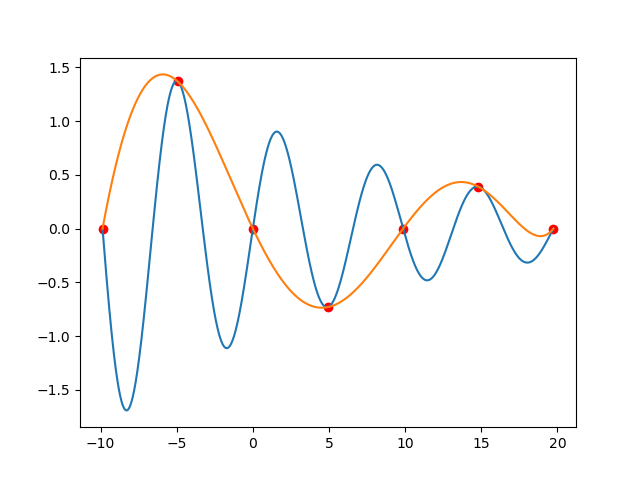

In [44]:
%matplotlib notebook
x, y = get_nodes(f8, 7, uniform_nodes)
plt.scatter(x, y, color='red')
nx, ny = interpolation_newton(x, y, 1000)
plt.plot(X, Y)
plt.plot(nx, ny)

<IPython.core.display.Javascript object>


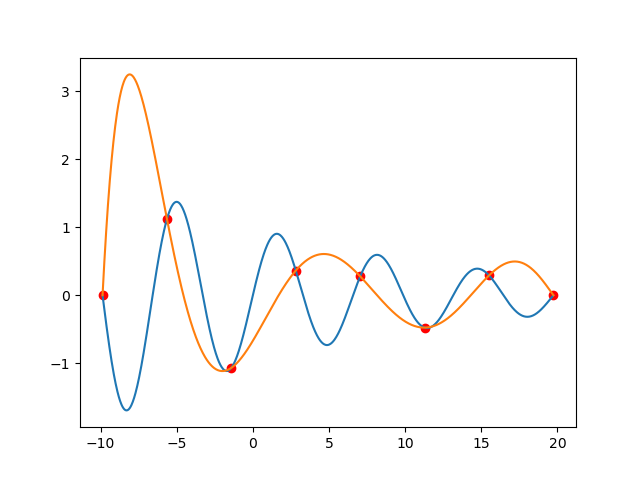

In [48]:
%matplotlib notebook
x, y = get_nodes(f8, 8, uniform_nodes)
plt.scatter(x, y, color='red')
nx, ny = interpolation_newton(x, y, 1000)
plt.plot(X, Y)
plt.plot(nx, ny)

<IPython.core.display.Javascript object>


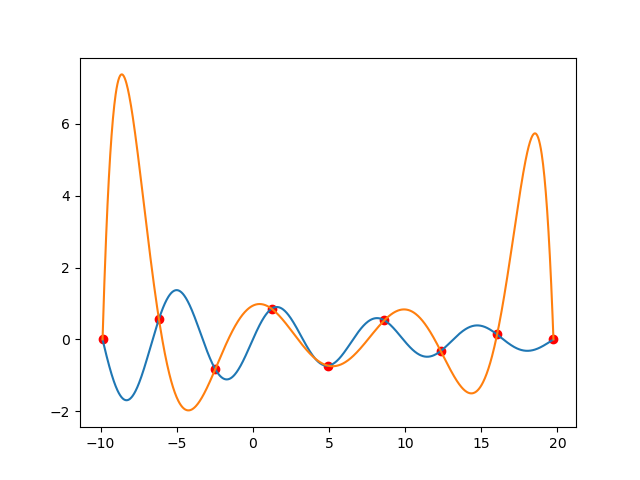

In [49]:
%matplotlib notebook
x, y = get_nodes(f8, 9, uniform_nodes)
plt.scatter(x, y, color='red')
nx, ny = interpolation_newton(x, y, 1000)
plt.plot(X, Y)
plt.plot(nx, ny)

<IPython.core.display.Javascript object>


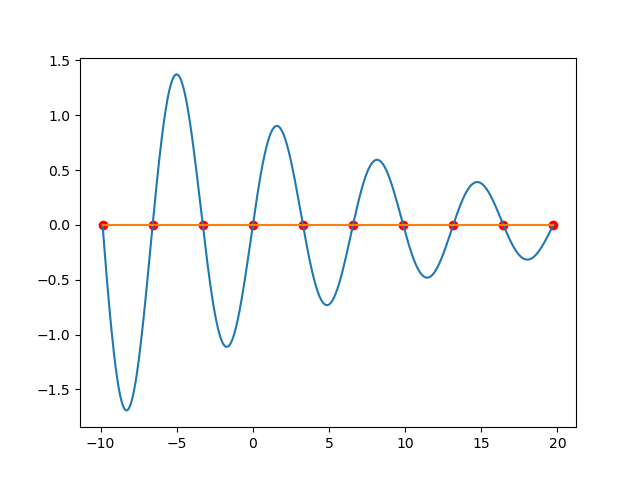

In [59]:
%matplotlib notebook
x, y = get_nodes(f8, 10, uniform_nodes)
plt.scatter(x, y, color='red')
nx, ny = interpolation_newton(x, y, 1000)
plt.plot(X ,Y)
plt.plot(nx, ny)
plt.show()


<IPython.core.display.Javascript object>


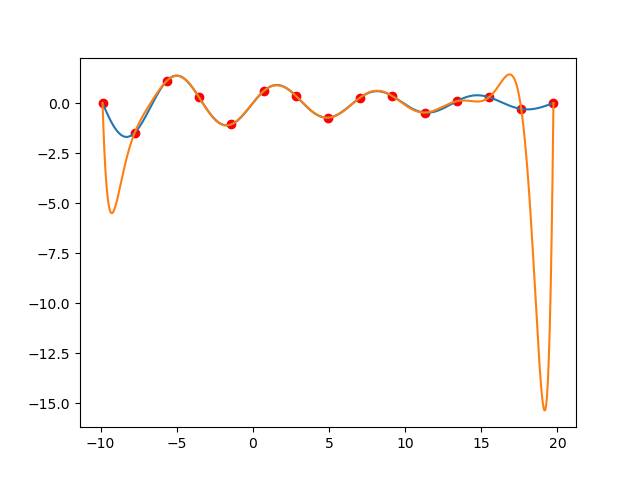

In [61]:
%matplotlib notebook
x, y = get_nodes(f8, 15, uniform_nodes)
plt.scatter(x, y, color='red')
nx, ny = interpolation_newton(x, y, 1000)
plt.plot(X, Y)
plt.plot(nx, ny)
plt.show()

<IPython.core.display.Javascript object>


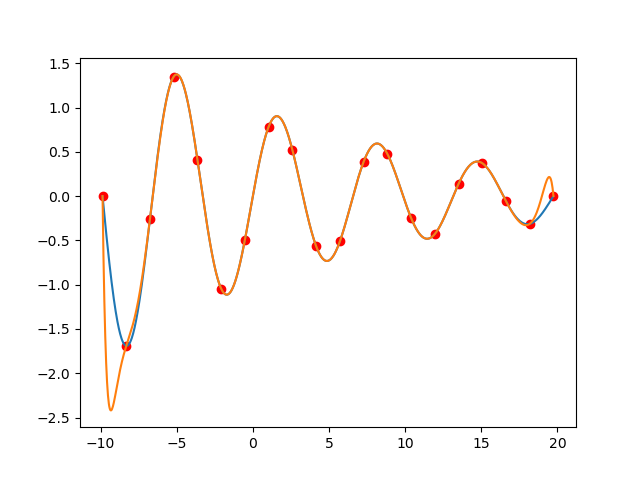

In [11]:
%matplotlib notebook
x, y = get_nodes(f8, 20, uniform_nodes)
plt.scatter(x, y, color='red')
nx, ny = interpolation_newton(x, y, 1000)
plt.plot(X, Y)
plt.plot(nx, ny)
plt.show()

<IPython.core.display.Javascript object>


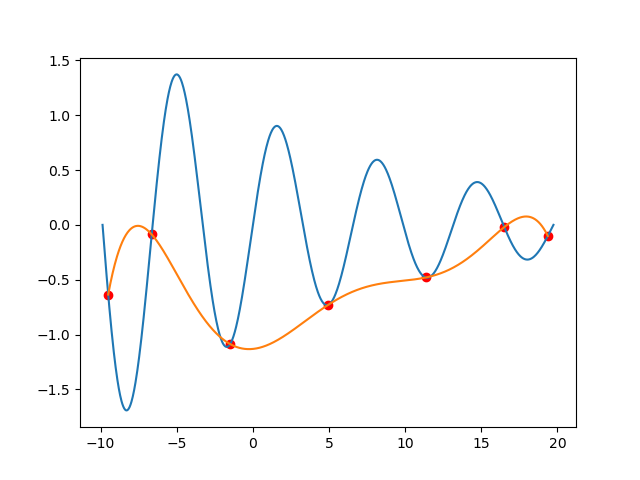

In [64]:
%matplotlib notebook
x, y = get_nodes(f8, 7, chebyshev_nodes)
plt.scatter(x, y, color='red')
nx, ny = interpolation_newton(x, y, 1000)
plt.plot(X, Y)
plt.plot(nx, ny)

<IPython.core.display.Javascript object>


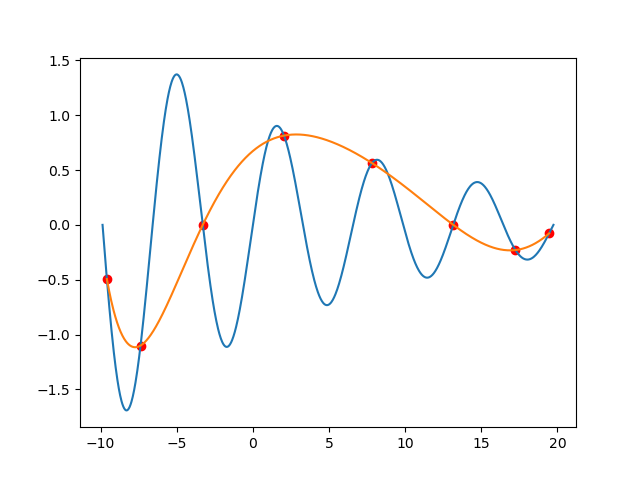

In [70]:
%matplotlib notebook
x, y = get_nodes(f8, 8, chebyshev_nodes)
plt.scatter(x, y, color='red')
nx, ny = interpolation_newton(x, y, 1000)
plt.plot(X, Y)
plt.plot(nx, ny)

<IPython.core.display.Javascript object>


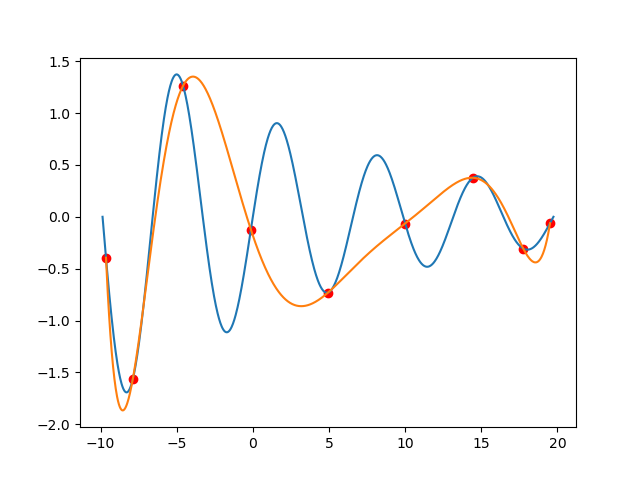

In [71]:
%matplotlib notebook
x, y = get_nodes(f8, 9, chebyshev_nodes)
plt.scatter(x, y, color='red')
nx, ny = interpolation_newton(x, y, 1000)
plt.plot(X, Y)
plt.plot(nx, ny)

<IPython.core.display.Javascript object>


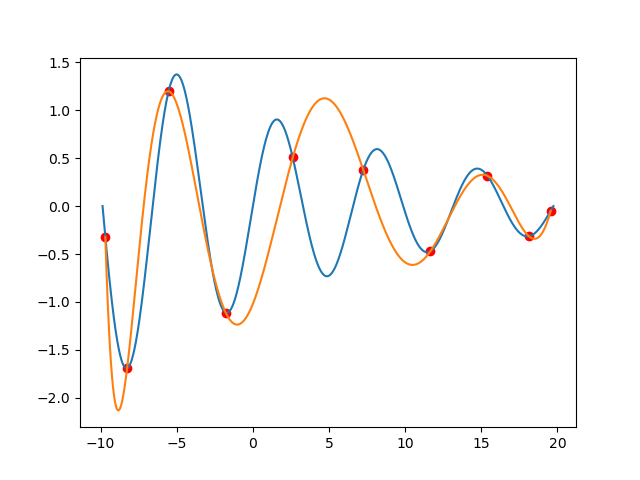

In [72]:
%matplotlib notebook
x, y = get_nodes(f8, 10, chebyshev_nodes)
plt.scatter(x, y, color='red')
nx, ny = interpolation_newton(x, y, 1000)
plt.plot(X, Y)
plt.plot(nx, ny)

<IPython.core.display.Javascript object>


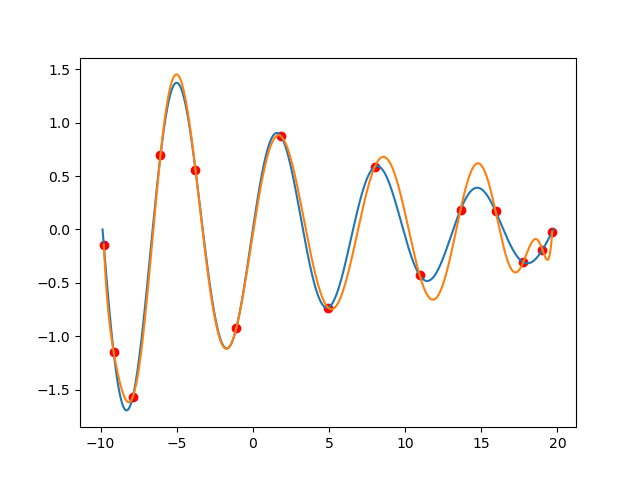

In [73]:
%matplotlib notebook
x, y = get_nodes(f8, 15, chebyshev_nodes)
plt.scatter(x, y, color='red')
nx, ny = interpolation_newton(x, y, 1000)
plt.plot(X, Y)
plt.plot(nx, ny)

<IPython.core.display.Javascript object>


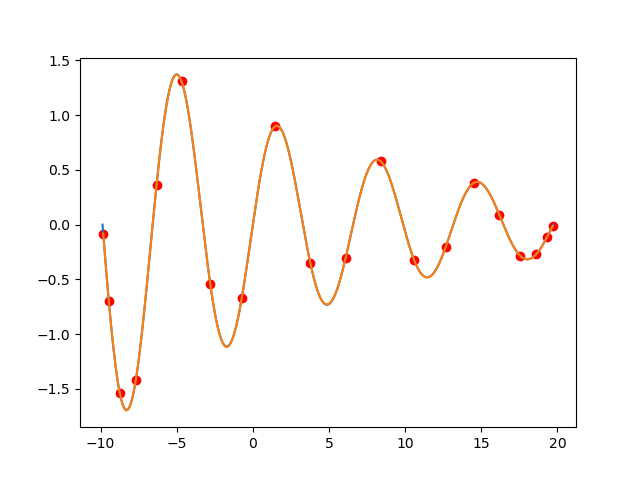

In [74]:
%matplotlib notebook
x, y = get_nodes(f8, 20, chebyshev_nodes)
plt.scatter(x, y, color='red')
nx, ny = interpolation_newton(x, y, 1000)
plt.plot(X, Y)
plt.plot(nx, ny)